<a href="https://colab.research.google.com/github/VallecilloIgnacioM/DataScienceCoder/blob/main/Visualizacion_Vallecillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica Integradora: Visualización de Python**

**Propietario: Ignacio Manuel Vallecillo**

# IMPORTACION DE LIBRERIAS Y CONFIGURACION DE ESTILOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mpl.style.use('bmh')
sns.set(style="whitegrid")
sns.color_palette("flare", as_cmap=True)

# 1. Cargar este archivo en Python. Realizar estadísticas descriptivas básicas


In [ ]:
# Se monta el Dataset en una variable para luego copiarla y usarla en  los distintos ejercicios con la configuracion que necesitemos, asi evitar modificar la original.
df_datos0 = pd.read_csv('https://drive.google.com/uc?export=download&id=1ZToQzA4F_4XbDXCOAXTWgSyirk2zpHXE')
df_datos = df_datos0

# Configuramos el index con el ID de los empleados y eliminamos la columna EmpID
df_datos.index = df_datos['EmpID']
df_datos = df_datos.drop('EmpID', axis='columns')
df_datos.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## **Estadisticas Descriptivas del DataSet**

In [ ]:
df_datos.describe()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


#2. Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares?


In [ ]:
# Preparacion de los datos para crear el Histograma
df_datos2 = df_datos0

datos_salario = df_datos2['Salary'].values.flatten()
# Creamos la variable intervalos para usarla como bins.
# Creamos intervalos entre los valores limites del rango salarial y lo dividimos
# en intervalos salariales con diferencia de 30.000USD.
# Min: $45.046     Max= $250.000
intervalos = range(min(datos_salario), max(datos_salario), 30000)

**Graficamos el Histograma**

Text(0, 0.5, 'Frecuencia Absoluta')

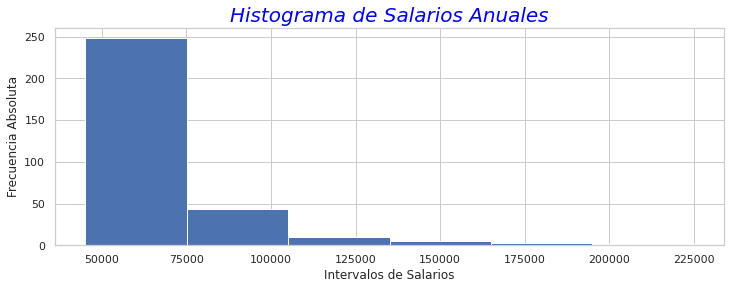

In [ ]:
# Creamos el canvas donde plasmaremos el Historgrama en la variable "fig" 
# y en "ax" setearemos todo lo necesario para crear el grafico.
fig, ax = plt.subplots(figsize=(12, 4))

# Graficacion del Histograma con los datos correspondientes
ax.hist(datos_salario, bins=intervalos )
# Seteo y configuracion de nombres de titulos y labels XY
ax.set_title('Histograma de Salarios Anuales')
ax.title.set_fontstyle(fontstyle='italic')
ax.title.set_size(fontsize=20)
ax.title.set_color('blue')
ax.set_xlabel('Intervalos de Salarios')
ax.set_ylabel('Frecuencia Absoluta')

**CONCLUSION:** Se puede concluir que el rango salarial de mayor popularidad es de 45.000 a 75.000 USD Anuales.

# 3. Realizar un gráfico de violín con los salarios, discriminados por género. 

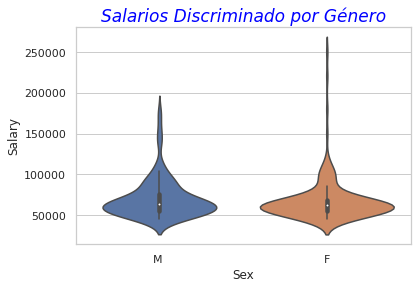

In [ ]:
df_datos3 = df_datos0

# Si bien en clase vimos la creacion de graficos de violin a partir de catplot pasando como parametro el tipo de grafico a utilizar
# decidi ir por mi cuenta y leer la documentacion para hacer el grafico

# Le pasamos a la funcion graficadora los parametros a comparar
# Si bien el ejercicio pide por "Genero" para evitar hacer modificaciones del dataset
# y como solo se presentan dos generos "F=0 y M=1" decidi usar la columna "Sex"
# porque ya vine discriminado por letras
df_salario = sns.violinplot(x ='Sex', y ='Salary', data= df_datos3)
df_salario.set_title('Salarios Discriminado por Género')
df_salario.title.set_fontstyle(fontstyle='italic')
df_salario.title.set_size(fontsize=17)
df_salario.title.set_color('blue')
df_salario

**CONCLUSION:** Se puede observar que el rango salarial que mas abarca, tanto de hombres como mujeres, es entre los 50.000 y 65.000. Se puede ver tambien que la dispersion de salarios es mayor en el hombre que en la mujer, sin embargo el salario mas alto lo tienen las mujeres, segun los datos presentados.

# 4. Graficar la serie de tiempo correspondiente a la fecha de contratación (DateofHire)



**Preparacion de los Datos**

In [ ]:
df_contratacion = df_datos0

# Convertimos los datos de la columna "DateofHire" a datetime
df_contratacion['DateofHire'] = pd.to_datetime(df_contratacion["DateofHire"])

# Seteamos el index solo con el año y renombramos la columna "DateofHire" para evitar ambiguedad
df_contratacion.index = pd.DatetimeIndex(df_contratacion['DateofHire']).year
df_contratacion.rename(columns={'DateofHire':'DateHire'}, inplace=True)

**Obtenemos los datos a graficar**

In [ ]:
# Agrupamos las filas por año y contamos la cantidad de empleados contratados

# El groupby.count() va agrupar por años y contar por cada columna
df_contador_contrataciones = df_contratacion.groupby('DateofHire').count()
# Nos quedamos solo con los años y la cantidad de contratados por año
year = df_contador_contrataciones['EmpID'].index
contador =  df_contador_contrataciones['EmpID'].values

(2006.0, 2018.0)

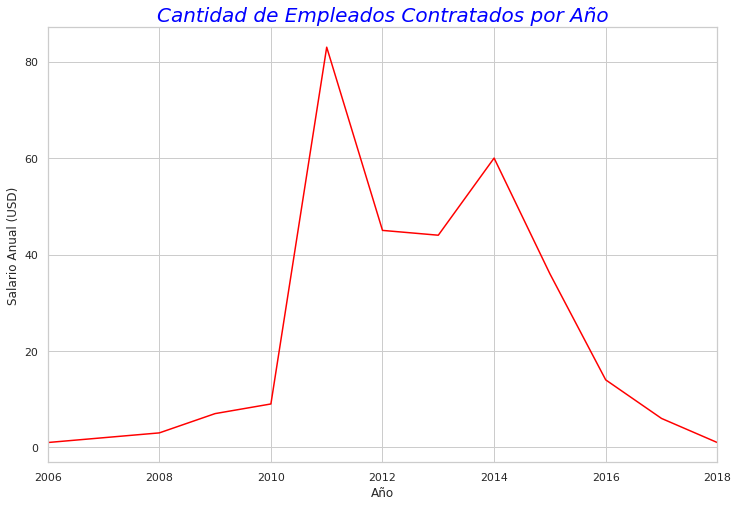

In [ ]:
# Creamos el canvas donde plasmaremos la Serie de Tiempo en la variable "fig" 
# y en "ax" setearemos todo lo necesario para crear el grafico.

fig, ax = plt.subplots(figsize=(12, 8))  
ax.plot(year,contador,color='red')

# Seteo de titulos y labels
ax.set_title('Cantidad de Empleados Contratados por Año')
ax.title.set_fontstyle(fontstyle='italic')
ax.title.set_size(fontsize=20)
ax.title.set_color('blue')
ax.set_ylabel('Salario Anual (USD)')
ax.set_xlabel('Año')

# Seteo de los limites del grafico
ax.set_xlim(year[0], year[-1])

CONCLUSION: Se puede observar que el mayor numero de contratados se dio en el año 2011 seguido por el año 2014.